x: 0 , y: 0
P:
 [[0.37207505 0.88368702]
 [0.53915755 0.35758676]
 [0.12890726 0.50019849]
 [0.54194044 0.4085942 ]
 [0.88044537 0.06408819]]
x: 1 , outer: (1, 0, 0)
y: 1 , outer: (1, 0, 0)
x: 0 , y: 0
P:
 [[0.57242275 0.78221851]
 [0.18744397 0.04499311]
 [0.34800016 0.56873161]
 [0.0911093  0.20600999]
 [0.20895414 0.95221947]]
x: 2 , outer: (1, 0, 0)
y: 2 , outer: (1, 0, 0)


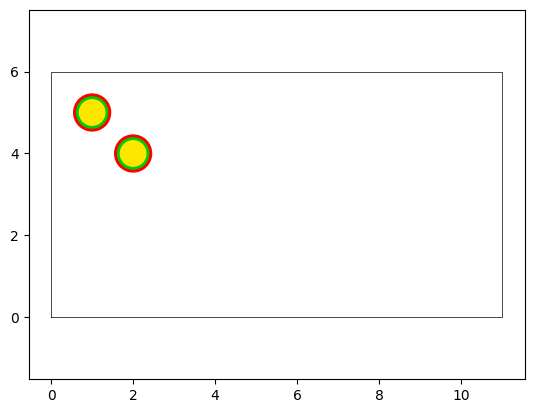

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim,ylim

class Frame:
    def __init__(self,canvas,position):
        self.canvas = canvas
        self.position = position
        self.userdata = None
        #self.frame()

    def gcc(self):                          # get current canvas
        return self.canvas
        
    def frame(self):
        xl = self.position[0]
        yl = self.position[1]
        xh = self.position[2]
        yh = self.position[3]
        axs = plt.plot([xl,xh,xh,xl,xl],[yl,yl,yh,yh,yl],'r')

#============================================================================================================
# Canvas class
# usage: can = Canvas()
#        can.circle((x,y),r,color)     # plot circle
#        can.equal()                   # set equal aspect ratio
#============================================================================================================

class Canvas:
    def __init__(self,pos):
        self.userdata = None
        self.fig = None
        self.ax = None
        self.position = pos

        self.fig,self.ax = plt.subplots() 
        self.frame()
        self.ax.axis('equal')

        xy = (2,2); r = 0.5; col = 'r'
        #self.circle(xy, r, col)
        #plt.show()

    def frame(self):                        # draw frame
        xl = self.position[0];  xh = self.position[2]
        yl = self.position[1];  yh = self.position[3]
        self.ax.plot([xl,xh,xh,xl,xl],[yl,yl,yh,yh,yl],color='k',linewidth=0.5)
        
    def circle(self,xy,r,col=None):
        hdl = plt.Circle(xy, r, color=col)   # create circle patch object
        self.ax.add_patch(hdl)               # add circle to axis' patches
        return hdl

    def equal(self):
        self.ax.axes('equal')

#============================================================================================================
# class Neuron
# usage: neu = Neuron(m,n,s,d)         # create Neuron instance
#        P = np.random.rand(s,d)       # permanences
#        neu.plot((i,j),x,y,P)
#============================================================================================================

class Neuron:
    def __init__(self,m,n,s,d):
        self.m = m;  self.n = n;  self.s = s;  self.d = d
        self.setup()

    def setup(self):
        self.r0 = 0.45;  self.r1 = 0.38;  self.r2 = 0.31
        self.ds = 0.12; self.rs = self.ds/3; 
        self.gray = (0.8,0.8,0.8);  self.red = (1,0,0)
        self.gold = (1,0.9,0);      self.dark = (0.5,0.5,0.5)
        self.blue = (0,0.5,1);      self.green=(0,0.8,0)
        
    def plot(self,ij,x=None,y=None,P=None):
        x = x if x else 0  
        y = y if y else 0
        print("x:",x,", y:",y)
        P = P if P else np.random.rand(self.s,self.d)
        print("P:\n",P)
        
        i = ij[0];  j = ij[1]
        x = 1+j; y = self.m+1-i;
        outer = self.red if y>0 else self.gray
        inner = self.green if x>0 else self.dark
        print("x:",x,", outer:",outer)
        print("y:",x,", outer:",outer)
        can.circle((x,y),self.r0,outer)
        can.circle((x,y),self.r1,inner)
        can.circle((x,y),self.r2,self.gold)


#============================================================================================================
# plot circle
# usage: circle(ax,(x,y),r,color)     # plot circle
#============================================================================================================

def circle(ax,xy,r,col=None):
    hdl = plt.Circle(xy, 0.2, color=col)
    #fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()

    ax.add_patch(hdl)
    return hdl    

def demo1():
    plt.plot([1, 2, 7, 4])
    plt.ylabel('some numbers')
    plt.show()

def demo2():
    fig,ax = plt.subplots() 
    ax.plot([1,2,3],[1,2,4])
    ax.axis('equal')
    circle(ax,(2,2),1,'g')

def demo3():
    can = Canvas([0,0,4,4])
    color = ('k','r','g',(0,1,1))
    for i in range(1,4):
        can.circle((i,i),0.5,color[i])
    plt.show()

def demo4():
    m = 4; n = 10; s = 5; d = 2
    r0 = 0.45;  r1 = 0.38;  r2 = 0.31
    ds = 0.12; rs = ds/3; 
    gray = (0.8,0.8,0.8);  red = (1,0,0)
    gold = (1,0.9,0);      dark = (0.5,0.5,0.5)
    blue = (0,0.5,1);      green=(0,0.8,0)

    can = Canvas([0,0,11,m+2])

    for j in range(0,n):
        x = 1+j; y = 1;
        #plt.plot([x,x],[1,m+1],color=blue,linewidth=3)
        can.circle((x,y),r2,blue)
    
    for i in range(0,m):
        for j in range(0,n):
            x = 1+j; y = m+1-i;
            can.circle((x,y),r0,red)
            can.circle((x,y),r1,green)
            can.circle((x,y),r2,gold)

            for mu in range(0,d):
                for nu in range(0,s):
                    xx = x + ds*(nu-(s-1)/2);  yy = y + ds*(mu-(d-1)/2)
                    p = np.random.rand()       # permanence
                    if p < 0.5:
                        can.circle((xx,yy),rs,'k')
                    else:
                        can.circle((xx,yy),rs,'w')
    plt.show()

m = 4;  n = 10;  s = 5;  d = 2
can = Canvas([0,0,n+1,m+2])
neu = Neuron(m,n,s,d)
neu.plot((0,0))
neu.plot((1,1))
plt.show()
